In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [74]:
# imdb데이터 불러오기
# 단어사전은 500개 까지 만 가져옴
# 원핫인코딩하면 500개 컬럼이 만들어짐.
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [92]:
print(train_input[0])

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [6]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [8]:
# 1의 의미 : 토큰시작
# 2의 의미 : 단어사전에 없는 단어 
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [10]:
# 2진 분류 : 긍정 - 1, 부정 - 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [75]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2, random_state=42
)

In [76]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [14]:
len(train_input[0])

259

In [17]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [19]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


In [21]:
np.max(lengths)

1854

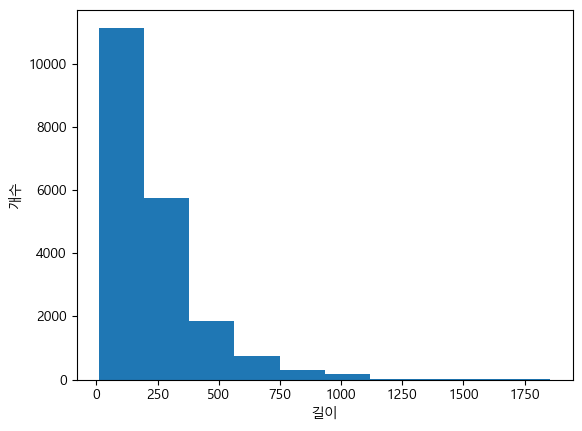

In [20]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [77]:
# 시퀀스 패딩
# 글자의 수를 제한해서 없는 부분은 0으로 채워줌
# 최대 글자수 100개 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)

In [78]:
train_input.shape

(20000,)

In [79]:
# 20000개 샘플, 크기 100
train_seq.shape

(20000, 100)

In [25]:
# 시퀀스패딩 적용해서 0이 없으면 글자 짤린것임.
# 시퀀스 패딩은 100개이상의 글자를 짜를때 앞부분을 짜름.(뒤 내용이 더 중요판단)
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [27]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [32]:
# 6번째 샘플은 앞부분 0으로 채워져 있음
# 100개 단어보다 적은 데이터 임.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [80]:
# 검증세트 - 시퀀스패딩
val_seq = pad_sequences(val_input,maxlen=100)

In [34]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환신경망 알고리즘
# 시퀀스패딩 - 100크기, 단어사전-500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# fit훈련 데이터 3차원 행렬
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [81]:
train_oh = keras.utils.to_categorical(train_seq)

In [82]:
train_oh.shape

(20000, 100, 500)

In [49]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2])

In [52]:
# 원핫인코딩 된 값 출력 - 10번째 값이 1로 변경
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [54]:
# 500개 컬럼의 합은 무조건 1 - 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [55]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 인공신경망 훈련 동일
# Flatten 필요없음. 원핫인코딩
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                validation_data=(val_oh,val_target), 
                callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5082 - loss: 2.1303 - val_accuracy: 0.4874 - val_loss: 2.0247
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5057 - loss: 1.8861 - val_accuracy: 0.4874 - val_loss: 1.7428
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5089 - loss: 1.5996 - val_accuracy: 0.4874 - val_loss: 1.4473
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5072 - loss: 1.3208 - val_accuracy: 0.4874 - val_loss: 1.1581
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5014 - loss: 1.0591 - val_accuracy: 0.4878 - val_loss: 0.8380
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5361 - loss: 0.7468 - val_accuracy: 0.6222 - val_loss: 0.6524
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6335 - loss: 0.6462 - val_accuracy: 0.6568 - val_loss: 0.6347
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6697 - loss: 0.6247 - 

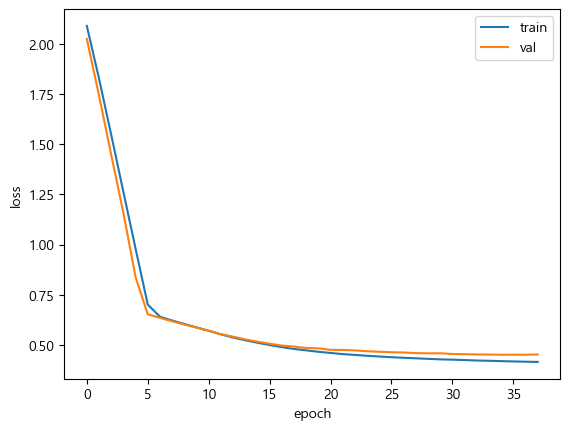

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [63]:
# stop위치 출력 - 2번 전의 모델이 가장 좋음.
early_stopping_cb.stopped_epoch

37

In [64]:
model.evaluate(val_oh,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7869 - loss: 0.4568


[0.45083341002464294, 0.7950000166893005]

In [65]:
# test_input
# 시퀀스 패딩
test_seq = pad_sequences(test_input,maxlen=100)
# 원핫인코딩
train_oh = keras.utils.to_categorical(test_seq)
model.evaluate(train_oh,test_target)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7936 - loss: 0.4482


[0.44895049929618835, 0.7931600213050842]

단어 임베딩

In [84]:
model2 = keras.Sequential()
# 임베딩층 추가
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
train_oh.shape

(20000, 100, 500)

In [86]:
train_target.shape

(20000,)

In [87]:
# 인공신경망 훈련 동일
# Flatten 필요없음.
# 원핫인코딩을 사용하지 않음. - 임베딩층 사용
# train_oh -> train_seq 데이터 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True )
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                validation_data=(val_seq,val_target), 
                callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5536 - loss: 0.6855 - val_accuracy: 0.6746 - val_loss: 0.6270
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6961 - loss: 0.6114 - val_accuracy: 0.7084 - val_loss: 0.5938
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7376 - loss: 0.5748 - val_accuracy: 0.7444 - val_loss: 0.5617
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7617 - loss: 0.5445 - val_accuracy: 0.7618 - val_loss: 0.5411
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7683 - loss: 0.5275 - val_accuracy: 0.7650 - val_loss: 0.5214
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7755 - loss: 0.5111 - val_accuracy: 0.7518 - val_loss: 0.5258
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7868 - loss: 0.4913 - val_accuracy: 0.7644 - val_loss: 0.5055
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7875 - loss: 0.4835 - val_accu

In [89]:
model2.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.4723


[0.4677310585975647, 0.7817999720573425]

In [90]:
# test_input
# 시퀀스 패딩
test_seq = pad_sequences(test_input,maxlen=100)
# 원핫인코딩
# test_oh = keras.utils.to_categorical(test_seq)
model2.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7873 - loss: 0.4623


[0.4636504352092743, 0.783840000629425]

In [35]:
# 딥러닝 훈련
# 데이터전처리 train_seq = pad_sequences(train_input,maxlen=100)

# 모델결정 model = keras.Sequential()
# 순환 신경망 (RNN)
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model.add(keras.layers.SimpleRNN(8))
# model.add(keras.layers.Dense(1,activation='sigmoid'))
# model.summary()


# 인공신경망 훈련
# 인공신경망 훈련 동일
# Flatten 필요없음. 원핫인코딩
# 모델설정 옵티마이저 - rmsprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# 모델훈련 history = model.fit(train_seq,train_target,batch_size=64,epochs=100,
#                 validation_data=(val_oh,val_target), 
#                 callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_seq,val_target)

# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# # 시퀀스 패딩
# test_seq = pad_sequences(test_input,maxlen=100)
# # 원핫인코딩
# #test_oh = keras.utils.to_categorical(test_seq)
# model.evaluate(test_seq,test_target)